<a href="https://colab.research.google.com/github/knxghtly/python-tensorflow-MLDL-Study/blob/main/%5B1_2%5D%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 데이터준비

+) np함수들

np.arange(1, 11, 2) / np.array(list)

np.ones((2,3)) / np.zeros((2,3)) / np.full((2,3), 9)

np.concatenate((narr1, narr2))

np.column_stack((narr1, narr2)) / np.row_stack((narr1, narr2))

2차원배열 슬라이싱: narray[:, 0] -> 모든 행(:)에 대해 첫 번째(0) 열을 가져온다.

In [ ]:
import matplotlib.pyplot as plt # graph 시각화를 위한 lib
import numpy as np # 배열 관리를 위한 lib
# from IPython.display import display # 여러 개의 표현식을 따로 출력(.display)하기 위한 lib

# bream(도미) vs smelt(빙어) 분류
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 450.0, 500.0, 500.0, 390.0,
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
                920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight
fish_data = np.column_stack((fish_length, fish_weight)) # [[fish_length, fish_weight], ...]
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # bream을 1(Positive Class)로 놓음

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, test_size=0.2 #, stratify=fish_target
    )

print(f"train_input:{train_input.shape}")
print(f"train_target:{train_target.shape}")
print(f"test_input:{test_input.shape}")
print(f"test_target:{test_target.shape}")

train_input:(39, 2)
train_target:(39,)
test_input:(10, 2)
test_target:(10,)


# 1. k-최근접 이웃 분류 모델

 - 가장 가까운 이웃들의 클래스를 따라감

메소드들
 - .fit: 모델 학습
 - .score: 모델 평가
 - .predict_proba: 예측확률계산
 - .kneighbors: 가장 가까운 데이터들의 distance, indexes를 반환

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5) # 기본값 5
kn.fit(train_input, train_target)
print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

1.0
1.0


##데이터 전처리 전

predict [37, 600] : [1.]
predict [25, 150] : [0.]


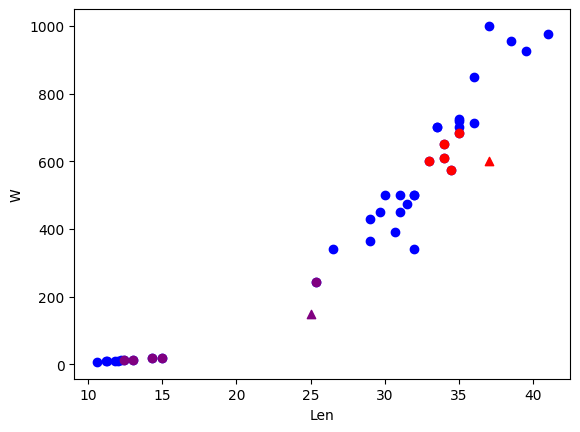

In [ ]:
ex1 = [37, 600]
ex2 = [25, 150]
print("predict", ex1, ":", kn.predict([ex1])) # [1.]: 도미
print("predict", ex2, ":", kn.predict([ex2])) # [0.]: 빙어(??)

# Draw
plt.xlabel("Len")
plt.ylabel("W")
dists1, idxs1 = kn.kneighbors([ex1])
dists2, idxs2 = kn.kneighbors([ex2])
plt.scatter(train_input[:, 0], train_input[:, 1], color="blue") # 모든 샘플의 점
plt.scatter(train_input[idxs1, 0], train_input[idxs1, 1], color="red") # ex1에 가까운 점들
plt.scatter(train_input[idxs2, 0], train_input[idxs2, 1], color="purple") # ex2에 가까운 점들
plt.scatter(ex1[0], ex1[1], color="red", marker="^")
plt.scatter(ex2[0], ex2[1], color="purple", marker="^")
plt.show()

##데이터 전처리 후
 - scale을 맞추자 -> 표준(Z) 점수 = (특성-평균)/표준편차

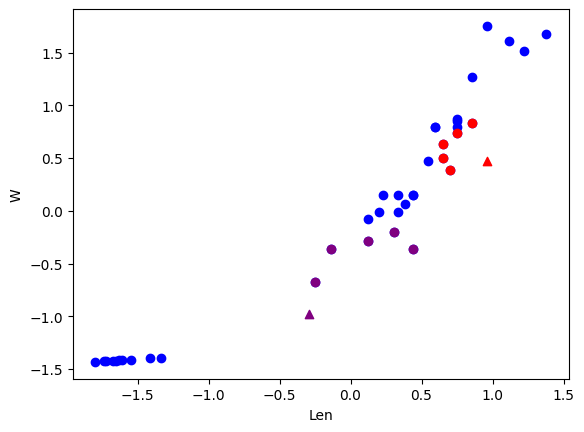

predict [37, 600] -> [0.96116172 0.47000472] : [1.]
predict [25, 150] -> [-0.29217817 -0.97372106] : [1.]


In [ ]:
mean = np.mean(train_input, axis=0) # [[mean(W), mean(Len)]] -> 열별로 평균
std = np.std(train_input, axis=0) # axis=0
ex1_scaled = (ex1 - mean) / std
ex2_scaled = (ex2 - mean) / std
train_scaled = (train_input - mean) / std
kn.fit(train_scaled, train_target)

# Draw
plt.xlabel("Len")
plt.ylabel("W")
dists1, idxs1 = kn.kneighbors([ex1_scaled])
dists2, idxs2 = kn.kneighbors([ex2_scaled])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], color="blue") # 모든 샘플의 점
plt.scatter(train_scaled[idxs1, 0], train_scaled[idxs1, 1], color="red") # ex1에 가까운 점들
plt.scatter(train_scaled[idxs2, 0], train_scaled[idxs2, 1], color="purple") # ex2에 가까운 점들
plt.scatter(ex1_scaled[0], ex1_scaled[1], color="red", marker="^")
plt.scatter(ex2_scaled[0], ex2_scaled[1], color="purple", marker="^")
plt.show()

print("predict", ex1, "->", ex1_scaled, ":", kn.predict([ex1_scaled])) # [1.]: 도미
print("predict", ex2, "->", ex2_scaled, ":", kn.predict([ex2_scaled])) # [1.]: 도미